In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
np.math=math
from scipy.integrate import odeint
import pysindy as ps
import scienceplots
from pysindy.differentiation import FiniteDifference
plt.style.use('science')

In [2]:
s=10
r=28
b=8/3
def Lorentz(y, t): #Ecuaciones de Henon Heiles
    x1,x2,x3  = y
    dydt = [s*(x2-x1)
            ,x1*(r-x3)-x2
            ,x1*x2-b*x3]
    return dydt

dt = 0.005
c.i: [-8, 7, 27]
[[ 0.         -9.99446122  9.99445876  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         27.95014828 -0.99027313  0.          0.          0.
  -0.99860449  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -2.66471265  0.          0.99926585
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
(x0)' = -9.994 x0 + 9.994 x1
(x1)' = 27.950 x0 + -0.990 x1 + -0.999 x0 x2
(x2)' = -2.665 x2 + 0.999 x0 x1


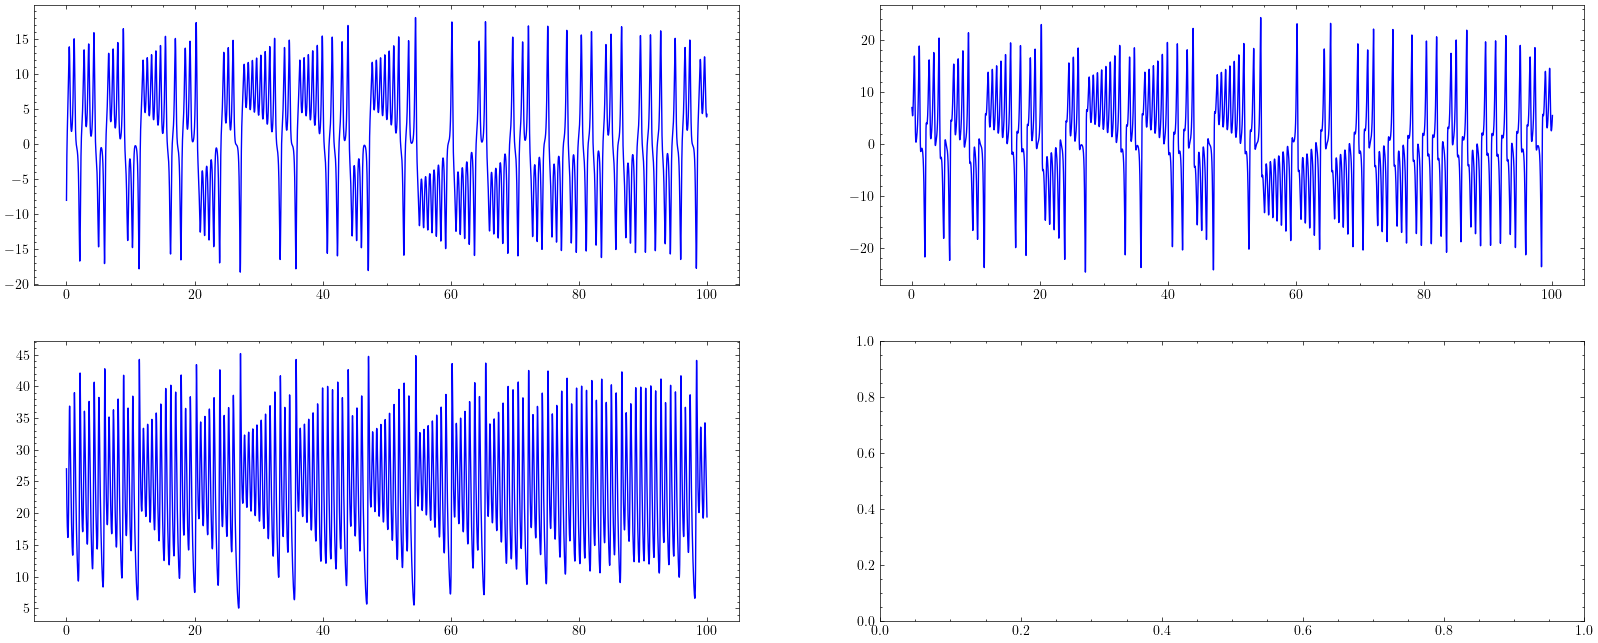

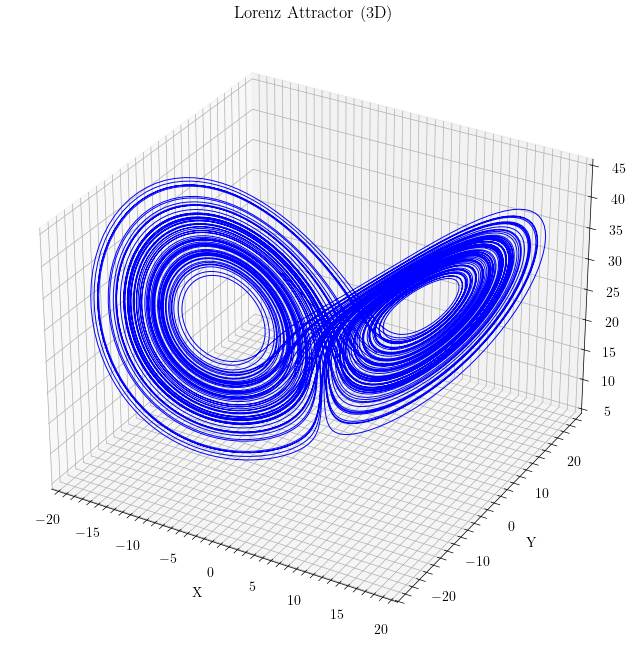

In [3]:

dt=0.005
k=1
t = np.arange(0, 100, dt)
x_arr = odeint(Lorentz, [-8,7,27], t)
print('dt =', dt) #Pasos en dt
print('c.i:',[-8,7,27])
print('===========================================')
#Gráficas de series temporales#############   
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr[:, 0], "b")
axs[0, 1].plot(t, x_arr[:, 1], "b")
axs[1, 0].plot(t, x_arr[:, 2], "b")
fig.show()

########Calculo de Derivadas##############
fd = FiniteDifference(order=2, drop_endpoints=True)
dx_arr = fd._differentiate(x_arr, t=dt) # Still pass dt

##########SINDy###############
threshold =0.7

model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold),
                 feature_library=ps.PolynomialLibrary(degree=3),
                 differentiation_method=fd) # Pass the differentiation method here
model.fit(x_arr, t=dt) # Also important to pass dt here

#############Coeficientes del modelo de ajuste#################
coef = model.coefficients()
print(coef[:, :])
print('===========================================')
model.print()
print('===========================================')
#GRAFICA DEL SISTEMA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_arr[:, 0], x_arr[:, 1], x_arr[:, 2], 'b', linewidth=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (3D)')
plt.show()

In [4]:
print(x_arr)

noise_level = 0.005  # 5% del rango típico de la señal
amplitude = np.max(np.abs(x_arr))
sigma = noise_level * amplitude
noise = np.random.normal(loc=0.0, scale=sigma, size=x_arr.shape)
x_noisy = x_arr + noise
print("-------------------------------")
print(x_noisy)

[[-8.          7.         27.        ]
 [-7.27044981  6.91526039 26.37860174]
 [-6.58102263  6.81474517 25.79314907]
 ...
 [ 4.15560658  5.16964309 19.72101878]
 [ 4.20869399  5.31813564 19.56873277]
 [ 4.26654994  5.47134809 19.42308374]]
-------------------------------
[[-8.02540629  6.80733404 26.75846245]
 [-6.99599016  7.25618591 26.40482458]
 [-6.91187664  6.73643515 25.77394155]
 ...
 [ 4.15131416  5.21084218 19.60934485]
 [ 4.05004527  5.43412711 19.58193788]
 [ 4.65617381  5.53793266 19.82409877]]


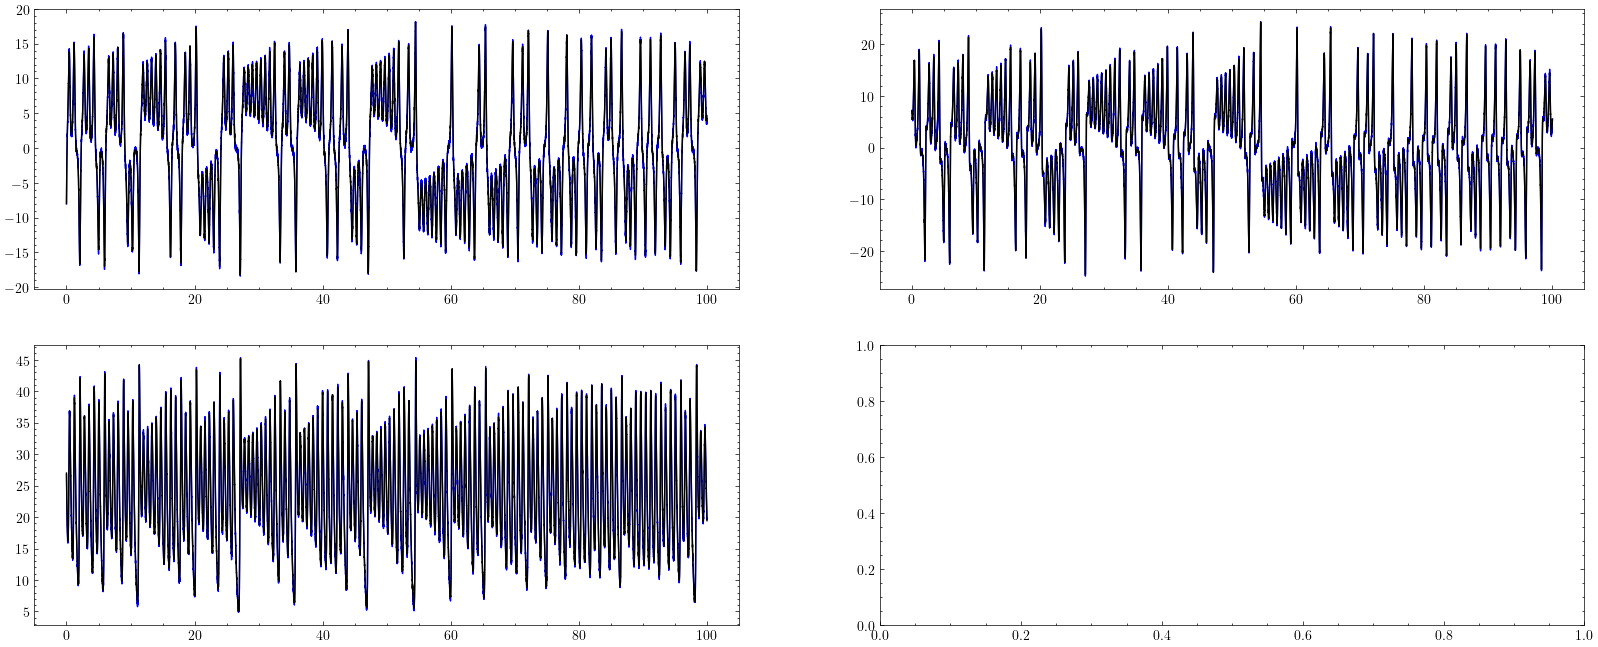

In [5]:
#Gráficas de series temporales#############   
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_noisy[:, 0], "b")
axs[0, 1].plot(t, x_noisy[:, 1], "b")
axs[1, 0].plot(t, x_noisy[:, 2], "b")

axs[0, 0].plot(t, x_arr[:, 0], "k")
axs[0, 1].plot(t, x_arr[:, 1], "k")
axs[1, 0].plot(t, x_arr[:, 2], "k")
fig.show()

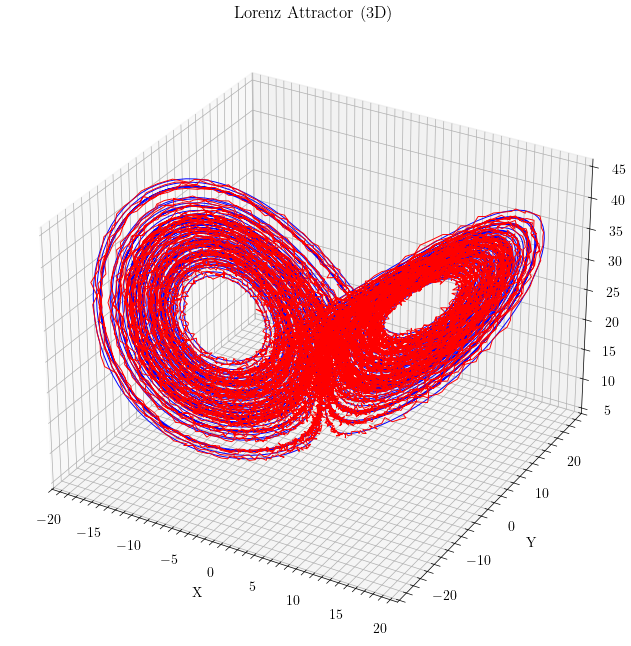

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_arr[:, 0], x_arr[:, 1], x_arr[:, 2], 'b', linewidth=0.7)
ax.plot(x_noisy[:, 0], x_noisy[:, 1], x_noisy[:, 2], 'r', linewidth=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (3D)')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
import scienceplots
plt.style.use('science')

[0, 1.1515, 0, np.float64(1.0226170556150838)]


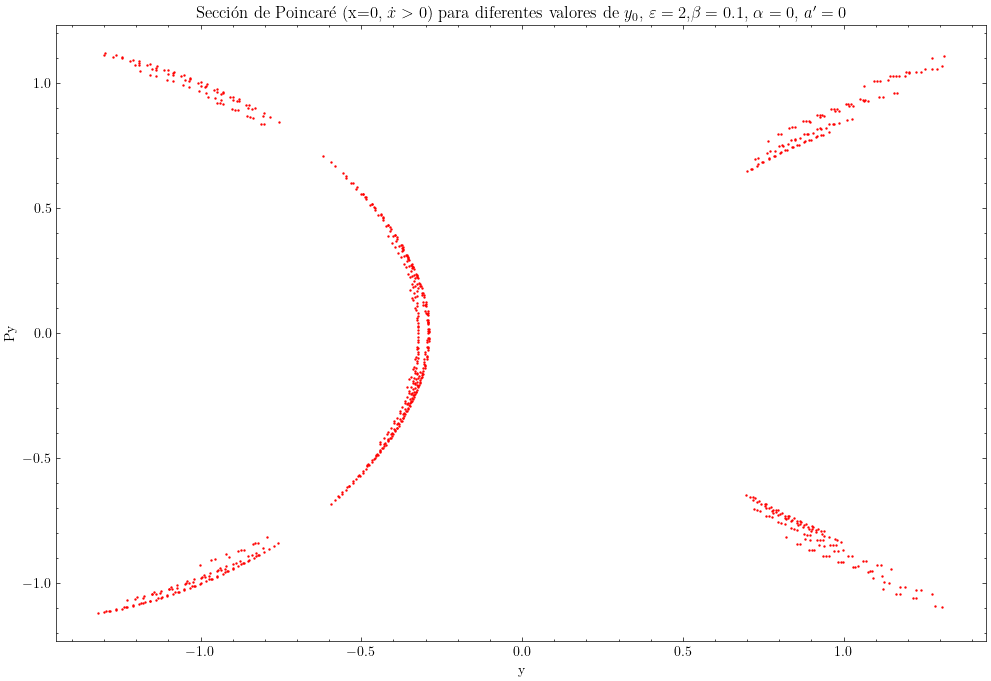

In [5]:
def safe_sqrt(x):
    return np.sqrt(np.clip(x, 0, None))

En = 2
beta = 1
alpha =1
a = 1
b=1
def hamilton_eqs(t, R):
    x, y, px, py = R
    dx_dt = px + beta*(y/2)
    dy_dt = py - beta*(x/2)
    dpx_dt = ((2*beta*py-beta**2*x)/2+((2*alpha*x+2*a*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2)))+((2*alpha*x-2*alpha*a)/((a**2-2*a*x+x**2+y**2)**(3/2))))/2
    dpy_dt = ((-2*beta*px-y*beta**2)/2+((2*y*alpha)/((a**2-2*a*x+x**2+y**2)**(3/2)))+((2*y*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2))))/2
    return [dx_dt, dy_dt, dpx_dt, dpy_dt]

plt.figure(figsize=(12, 8))
t_span=(0,500)
t_eval=np.linspace(t_span[0],t_span[1],10000)
x_0=0
y_0=1.1515
px_0=0
discriminant=2*En-(b**2*y_0**2)/4-4/safe_sqrt(a**2+y_0**2)
py_0= safe_sqrt(discriminant)
y0=[x_0,y_0,px_0,py_0]
sol = solve_ivp(hamilton_eqs, t_span, y0, method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

poincare_y = []
poincare_py = []

for i in range(len(sol.t) - 1):
    if np.abs(sol.y[0, i]) < 1e-1 and sol.y[2, i] > 0:
        poincare_y.append(sol.y[1, i])
        poincare_py.append(sol.y[3, i])

if poincare_y:
    plt.scatter(poincare_y, poincare_py, s=0.5, color='r', label=f"y_0 = {y_0:.2f}")
print(y0)
plt.xlabel("y")
plt.ylabel("Py")
plt.title(r"Sección de Poincaré (x=0, $\dot{x}>0$) para diferentes valores de $y_0$, $\varepsilon=2$,$\beta=0.1$, $\alpha=0$, $a^\prime=0$")
plt.show()

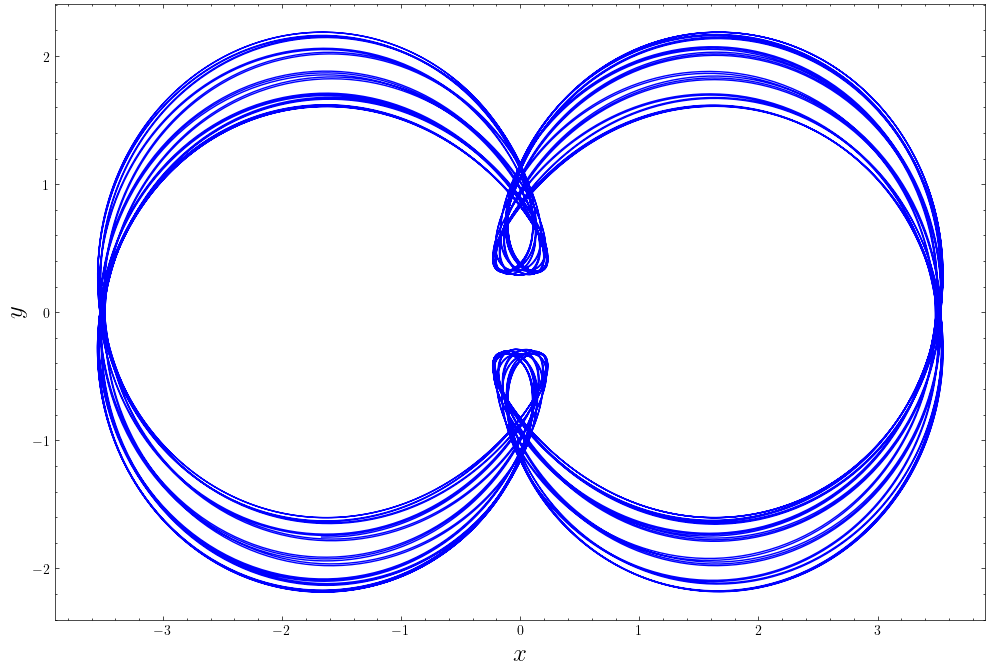

In [6]:
x_arr_test=[sol.y[0],sol.y[1],sol.y[2],sol.y[3]]
plt.figure(figsize=(12, 8))
plt.plot(x_arr_test[0],x_arr_test[1],'b-')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$y$",fontsize=18)
plt.savefig("trayectoria-cuasiperiodica.png")
plt.show()

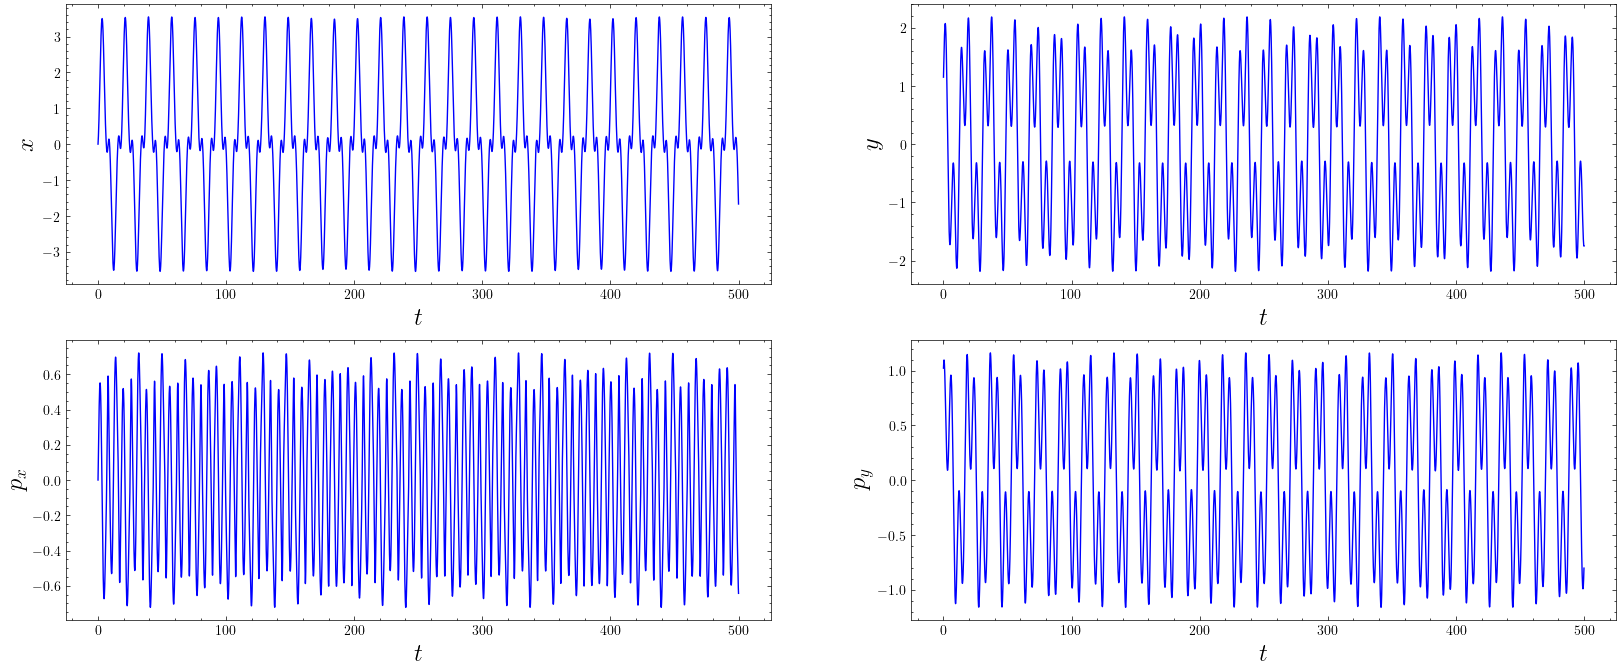

In [7]:
def safe_sqrt(x):
    return np.sqrt(np.clip(x, 0, None))

En = 2
beta = 1
alpha =1
a = 1

def hamilton_eqs(R,t):#Ecuaciones de Movimiento
    x, y, px, py = R
    dRdt=[px + beta*(y/2)
          ,py - beta*(x/2)
          ,((2*beta*py-beta**2*x)/2+((2*alpha*x+2*a*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2)))+((2*alpha*x-2*alpha*a)/((a**2-2*a*x+x**2+y**2)**(3/2))))/2
          ,((-2*beta*px-y*beta**2)/2+((2*y*alpha)/((a**2-2*a*x+x**2+y**2)**(3/2)))+((2*y*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2))))/2
          ]
    return dRdt

def coefficients(self):
    check_is_fitted(self, "model")
    return self.model.steps[-1][1].coef_

dt=0.005
k=1
t = np.arange(0, 500, dt)
x_arr_mine = odeint(hamilton_eqs,y0,t)
print('===========================================')
#Gráficas de series temporales#############   
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr_mine[:,0], "b")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$x$",fontsize=18)
axs[0, 1].plot(t, x_arr_mine[:,1], "b")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$y$",fontsize=18)
axs[1, 0].plot(t, x_arr_mine[:,2], "b")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$p_x$",fontsize=18)
axs[1, 1].plot(t, x_arr_mine[:,3], "b")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$p_y$",fontsize=18)
fig.show()
plt.savefig("Evolucion-temporal.png")

In [6]:
########Calculo de Derivadas##############
fd = FiniteDifference(order=2, drop_endpoints=True)
dx_arr_mine = fd._differentiate(x_arr_mine, t=dt) # Still pass dt
##############CREAR LIBRERIA DE FUNCIONES#####################
a = 1.0  # valor de a en tu sistema

def coulomb_fx(x, y):
    r1 = ((x - a)**2 + y**2)**(3/2)
    r2 = ((x + a)**2 + y**2)**(3/2)
    return (x - a)/r1 + (x + a)/r2

def coulomb_fy(x, y):
    r1 = ((x - a)**2 + y**2)**(3/2)
    r2 = ((x + a)**2 + y**2)**(3/2)
    return y * (1/r1 + 1/r2)
def name_fx(*vars):
    return "((x0 - a)/(((x0 - a)**2 + x1**2)**(3/2))) + ((x0 + a)/(((x0 + a)**2 + x1**2)**(3/2)))"

def name_fy(*vars):
    return "x1*(1/(((x0 - a)**2 + x1**2)**(3/2)) + 1/(((x0 + a)**2 + x1**2)**(3/2)))"

custom_lib = ps.CustomLibrary(library_functions=[coulomb_fx, coulomb_fy],function_names=[name_fx,name_fy])

library = ps.GeneralizedLibrary([ps.PolynomialLibrary(degree=4, include_interaction=True),custom_lib])

##########SINDy###############
threshold =0.1
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold),
                 feature_library=library,
                 differentiation_method=fd) # Pass the differentiation method here
model.fit(x_arr_mine, t=dt) # Also important to pass dt here

#############Coeficientes del modelo de ajuste#################
coef = model.coefficients()
print(coef[:, :])
print('===========================================')
model.print()
print('===========================================')

[[ 0.          0.          0.50000041  0.99999048  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.49999828  0.          0.          0.9999946   0.
   0.          0.        

-------------------------------------------------------
azul= Solucion con ecuaciones de movimiento originales
azul= Solucion con ecuaciones de movimiento de SINDy


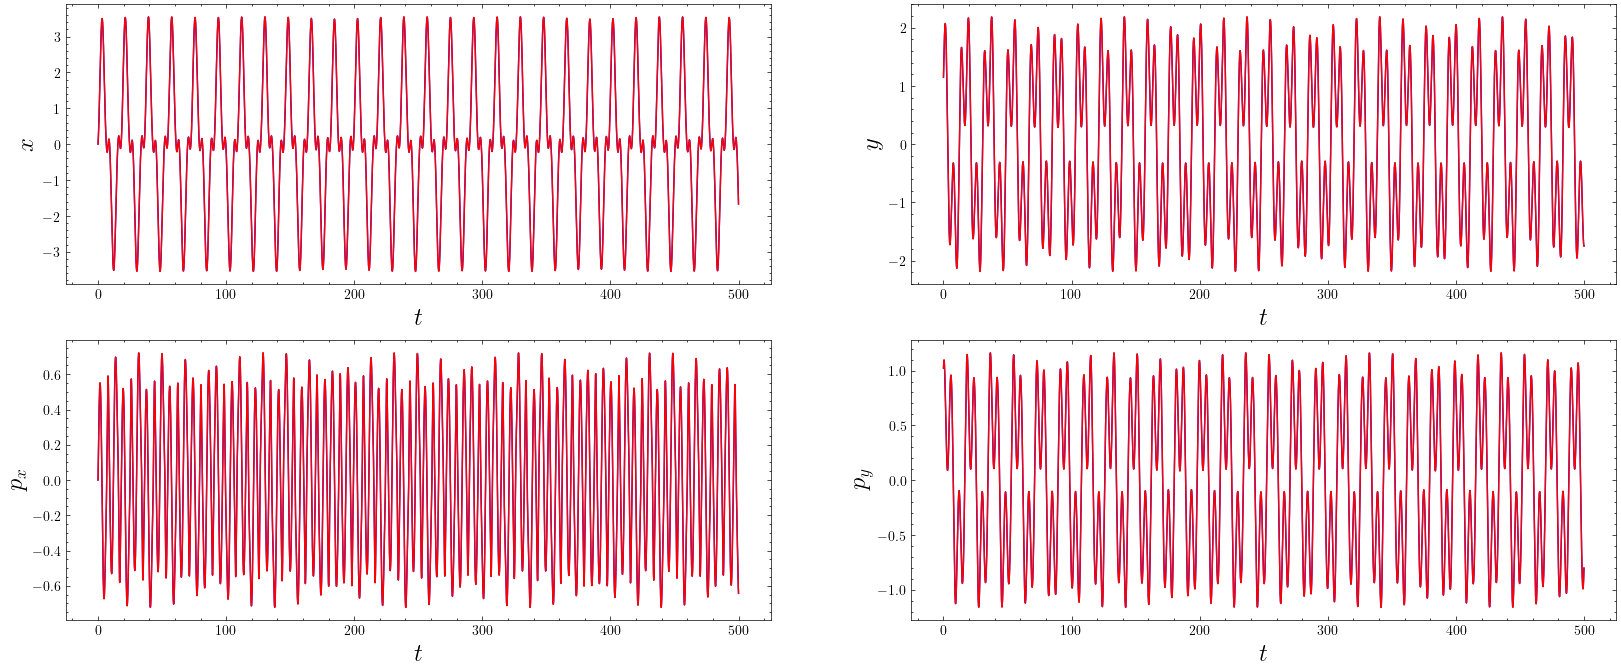

In [8]:
#MODELO SINDY
def eomSINDY(R,t):
    x0,x1,x2,x3=R
    dRdt=[0.5*x1+x2,
          x3-0.5*x0,
          -0.250*x0 + 0.500*x3 +(x0 - a)/(((x0 - a)**2 + x1**2)**(3/2)) + ((x0 + a)/(((x0 + a)**2 + x1**2)**(3/2))),
          -0.250*x1 + -0.500*x2 +x1*(1/(((x0 - a)**2 + x1**2)**(3/2)) + 1/(((x0 + a)**2 + x1**2)**(3/2)))
        ]
    return dRdt
x_arr_sindy = odeint(eomSINDY, [x_0, y_0, px_0, py_0], t)
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr_mine[:, 0], "b")
axs[0, 0].plot(t, x_arr_sindy[:, 0], "r")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$x$",fontsize=18)
axs[0, 1].plot(t, x_arr_mine[:, 1], "b")
axs[0, 1].plot(t, x_arr_sindy[:, 1], "r")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$y$",fontsize=18)
axs[1, 0].plot(t, x_arr_mine[:, 2], "b")
axs[1, 0].plot(t, x_arr_sindy[:, 2], "r")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$p_x$",fontsize=18)
axs[1, 1].plot(t, x_arr_mine[:, 3], "b")
axs[1, 1].plot(t, x_arr_sindy[:, 3], "r")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$p_y$",fontsize=18)
fig.show()
plt.savefig("Evolucion-temporal-SINDy.png")
print('-------------------------------------------------------')
print('azul= Solucion con ecuaciones de movimiento originales')
print('azul= Solucion con ecuaciones de movimiento de SINDy')


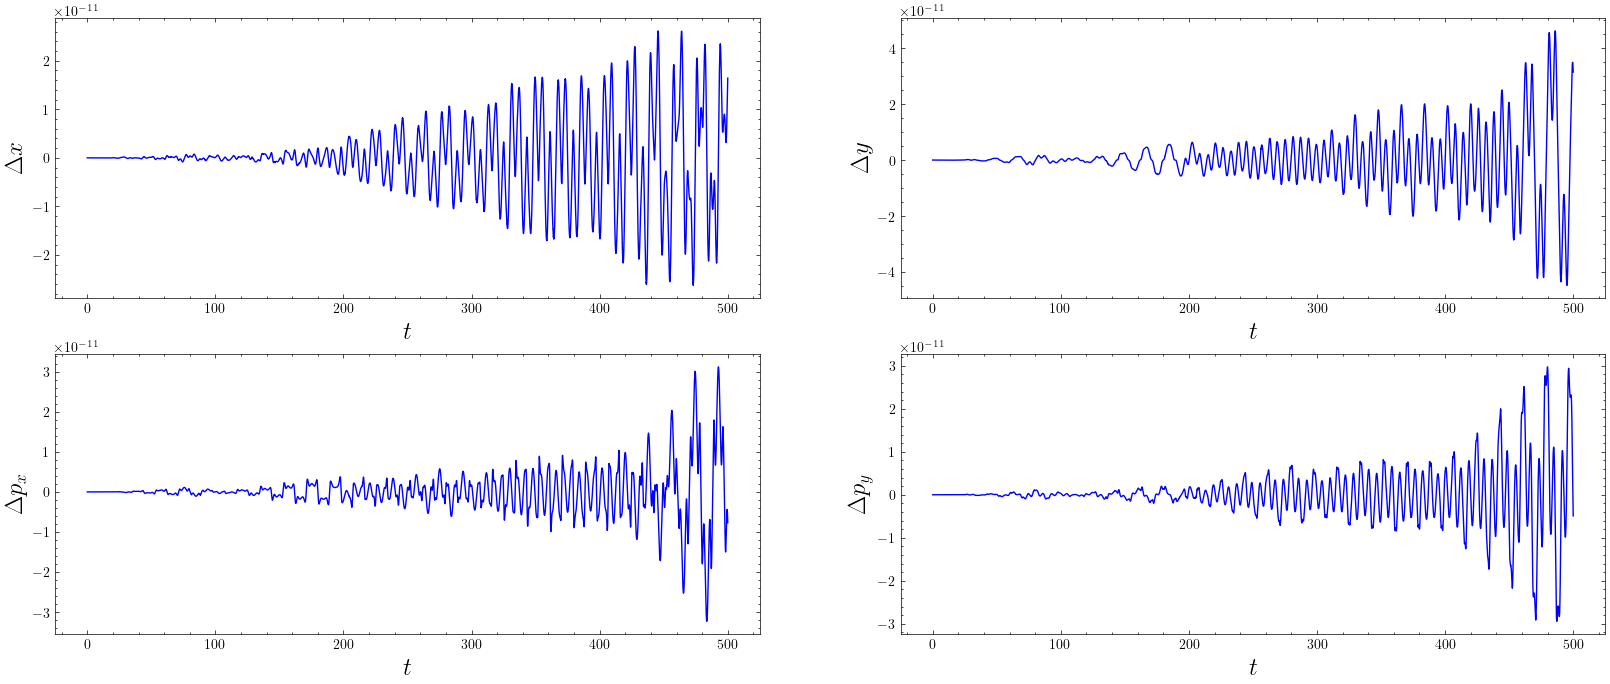

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr_sindy[:, 0]-x_arr_mine[:, 0], "b")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$\Delta x$",fontsize=18)
axs[0, 1].plot(t, x_arr_sindy[:, 1]-x_arr_mine[:, 1], "b")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$\Delta y$",fontsize=18)
axs[1, 0].plot(t, x_arr_sindy[:, 2]-x_arr_mine[:, 2], "b")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$\Delta p_x$",fontsize=18)
axs[1, 1].plot(t, x_arr_sindy[:, 3]-x_arr_mine[:, 3], "b")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$\Delta p_y$",fontsize=18)
fig.show()
plt.savefig("error-cuasiperiodico-SINDy.png")

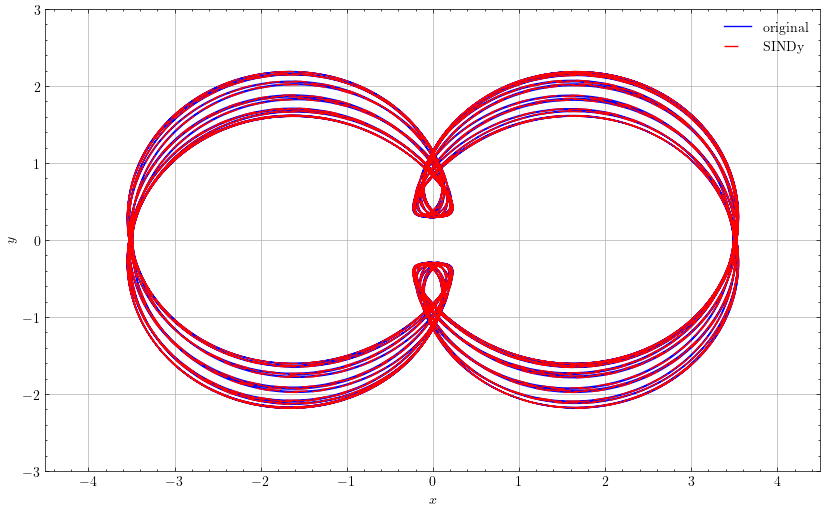

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_arr_mine[:,0],x_arr_mine[:,1],'b-',label='original')
plt.plot(x_arr_sindy[:,0],x_arr_sindy[:,1],'r--',linestyle=(0,(10,10)),label='SINDy')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-3,3)
plt.xlim(-4.5,4.5)
plt.grid()
plt.legend()
plt.savefig("Trayectoria-SINDy.png")
plt.show()

CAOS

[0, 1.6364, 0, np.float64(1.1156981982220484)]


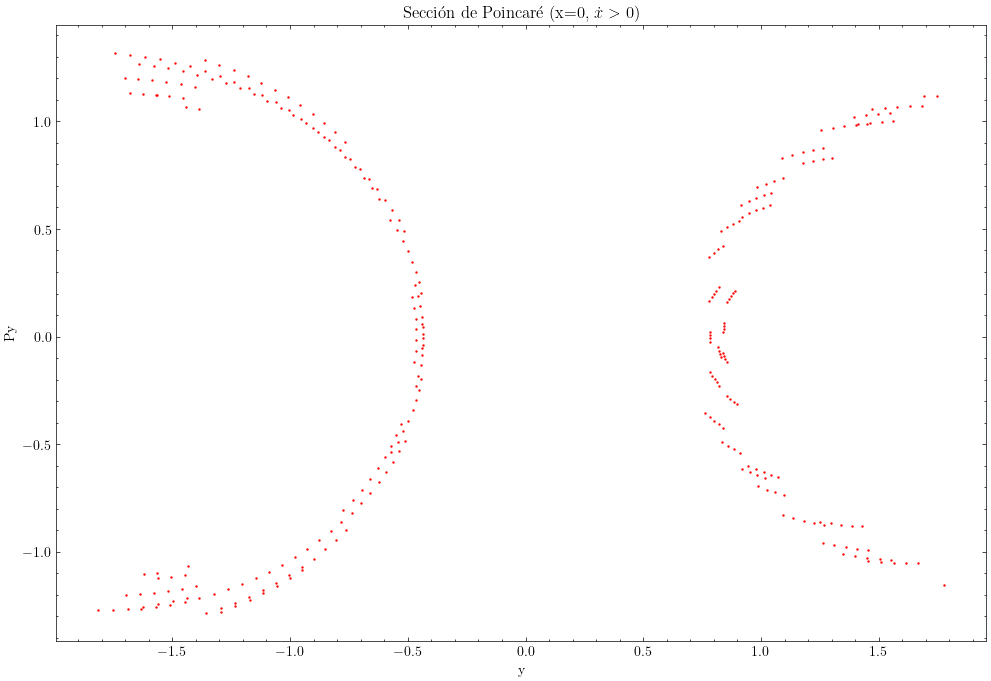

In [10]:
def safe_sqrt(x):
    return np.sqrt(np.clip(x, 0, None))

En = 2
beta = 1
alpha =1
a = 1

def hamilton_eqs(t, R):
    x, y, px, py = R
    dx_dt = px + beta*(y/2)
    dy_dt = py - beta*(x/2)
    dpx_dt = ((2*beta*py-beta**2*x)/2+((2*alpha*x+2*a*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2)))+((2*alpha*x-2*alpha*a)/((a**2-2*a*x+x**2+y**2)**(3/2))))/2
    dpy_dt = ((-2*beta*px-y*beta**2)/2+((2*y*alpha)/((a**2-2*a*x+x**2+y**2)**(3/2)))+((2*y*alpha)/((a**2+2*a*x+x**2+y**2)**(3/2))))/2
    return [dx_dt, dy_dt, dpx_dt, dpy_dt]

plt.figure(figsize=(12, 8))
t_span=(0,500)
t_eval=np.linspace(t_span[0],t_span[1],10000)
x_0=0
y_0=1.6364
px_0=0
discriminant=2*En-(b**2*y_0**2)/4-4/safe_sqrt(a**2+y_0**2)
py_0=safe_sqrt(discriminant)
y0=[x_0,y_0,px_0,py_0]
sol = solve_ivp(hamilton_eqs, t_span, y0, method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

poincare_y = []
poincare_py = []

for i in range(len(sol.t) - 1):
    if np.abs(sol.y[0, i]) < 1e-1 and sol.y[2, i] > 0:
        poincare_y.append(sol.y[1, i])
        poincare_py.append(sol.y[3, i])

if poincare_y:
    plt.scatter(poincare_y, poincare_py, s=0.5, color='r', label=f"y_0 = {y_0:.2f}")
print(y0)
plt.xlabel("y")
plt.ylabel("Py")
plt.title(r"Sección de Poincaré (x=0, $\dot{x}>0$)")
plt.show()

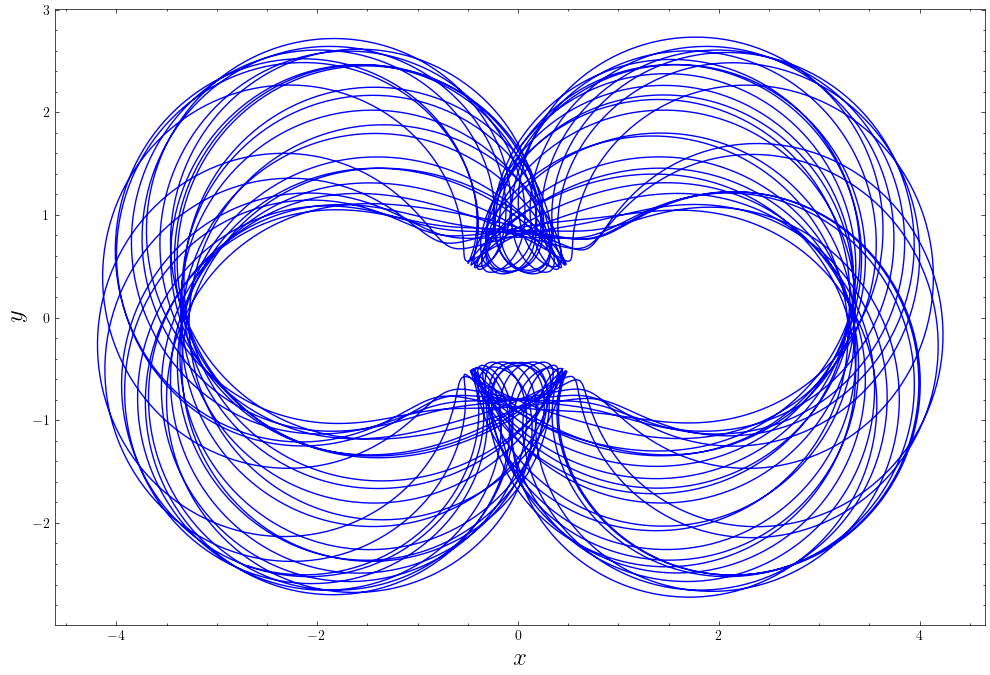

In [11]:
x_arr_test_chaos=[sol.y[0],sol.y[1],sol.y[2],sol.y[3]]
plt.figure(figsize=(12, 8))
plt.plot(x_arr_test_chaos[0],x_arr_test_chaos[1],'b-')
plt.xlabel(r"$x$",fontsize=18)
plt.ylabel(r"$y$",fontsize=18)
plt.savefig("trayectoria-chaos.png")
plt.show()

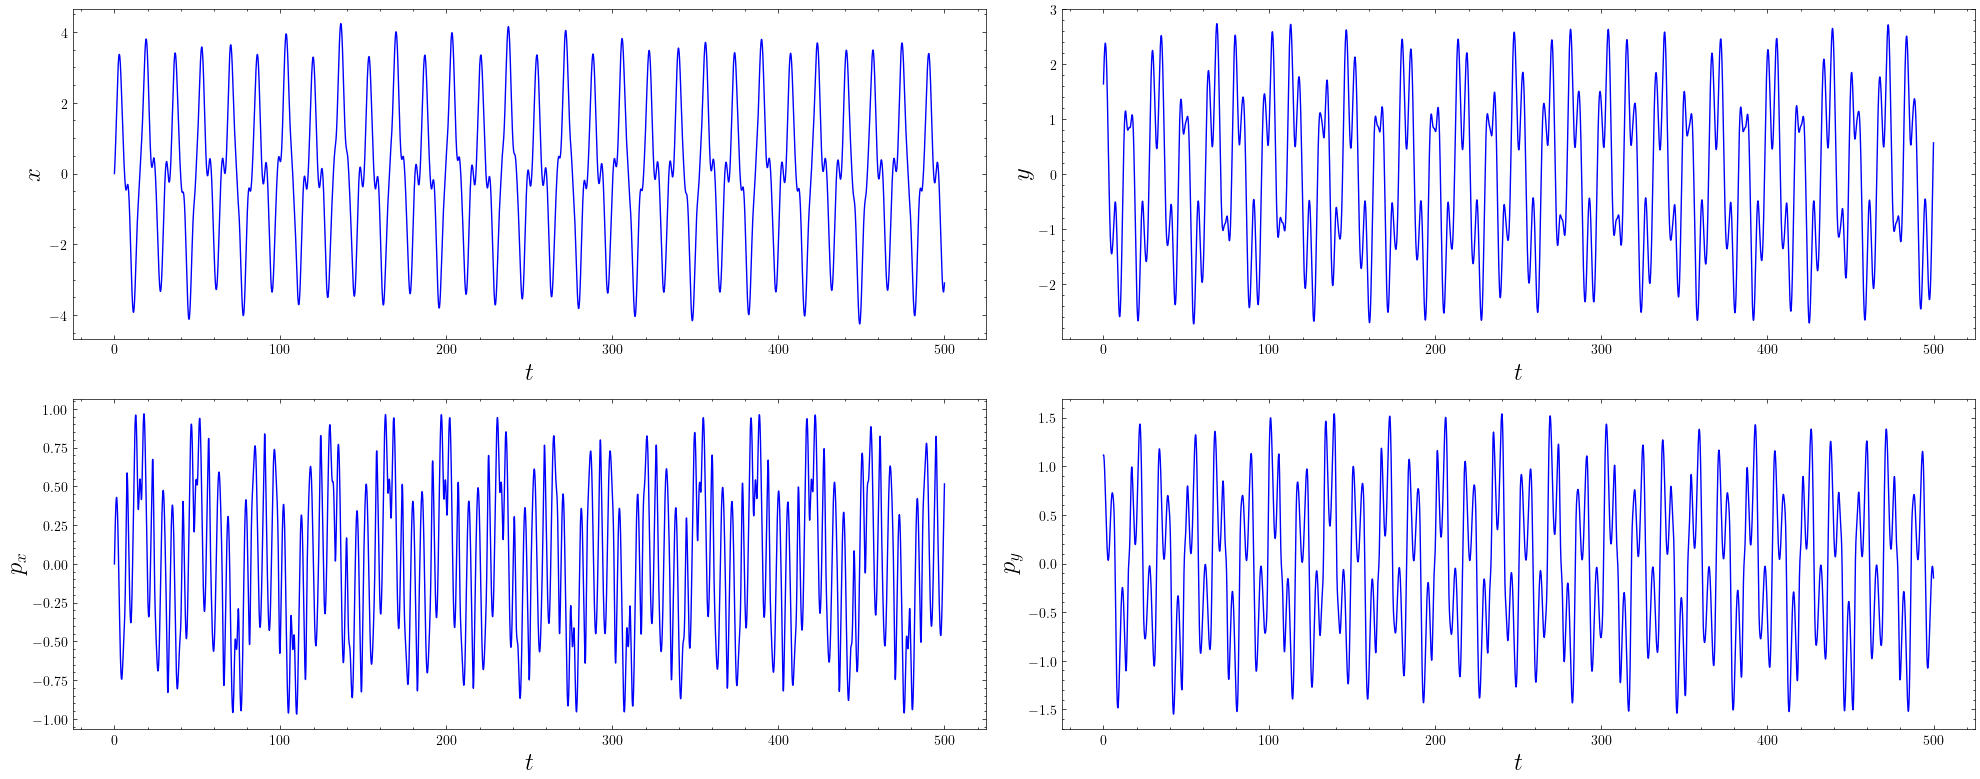

In [12]:
def hamilton_eqs(t, R):
    x, y, px, py = R
    dxdt = px + beta * y / 2
    dydt = py - beta * x / 2

    dpxdt = ( (2 * beta * py - beta**2 * x) / 2
             + (2 * alpha * x + 2 * a * alpha) / ((a**2 + 2*a*x + x**2 + y**2)**(3/2))
             + (2 * alpha * x - 2 * alpha * a) / ((a**2 - 2*a*x + x**2 + y**2)**(3/2)) ) / 2

    dpydt = ( (-2 * beta * px - y * beta**2) / 2
             + (2 * y * alpha) / ((a**2 - 2*a*x + x**2 + y**2)**(3/2))
             + (2 * y * alpha) / ((a**2 + 2*a*x + x**2 + y**2)**(3/2)) ) / 2

    return [dxdt, dydt, dpxdt, dpydt]


dt = 0.005
t_span = (0, 500)
t_eval = np.arange(t_span[0], t_span[1], dt)

sol = solve_ivp(hamilton_eqs, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)

x_arr_mine_chaos = sol.y.T
t = sol.t
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

axs[0, 0].plot(t, x_arr_mine_chaos[:, 0], "b")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$x$",fontsize=18)

axs[0, 1].plot(t, x_arr_mine_chaos[:, 1], "b")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$y$",fontsize=18)

axs[1, 0].plot(t, x_arr_mine_chaos[:, 2], "b")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$p_x$",fontsize=18)

axs[1, 1].plot(t, x_arr_mine_chaos[:, 3], "b")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$p_y$",fontsize=18)

plt.tight_layout()
plt.savefig("Evolucion-temporal-chaos.png")
plt.show()

In [11]:
########Calculo de Derivadas##############
fd = FiniteDifference(order=2, drop_endpoints=True)
dx_arr_mine = fd._differentiate(x_arr_mine_chaos, t=dt) # Still pass dt
##############CREAR LIBRERIA DE FUNCIONES#####################
a = 1.0  # valor de a en tu sistema

def coulomb_fx(x, y):
    r1 = ((x - a)**2 + y**2)**(3/2)
    r2 = ((x + a)**2 + y**2)**(3/2)
    return (x - a)/r1 + (x + a)/r2

def coulomb_fy(x, y):
    r1 = ((x - a)**2 + y**2)**(3/2)
    r2 = ((x + a)**2 + y**2)**(3/2)
    return y * (1/r1 + 1/r2)
def name_fx(*vars):
    return "((x0 - a)/(((x0 - a)**2 + x1**2)**(3/2))) + ((x0 + a)/(((x0 + a)**2 + x1**2)**(3/2)))"

def name_fy(*vars):
    return "x1*(1/(((x0 - a)**2 + x1**2)**(3/2)) + 1/(((x0 + a)**2 + x1**2)**(3/2)))"

custom_lib = ps.CustomLibrary(library_functions=[coulomb_fx, coulomb_fy],function_names=[name_fx,name_fy])

library = ps.GeneralizedLibrary([ps.PolynomialLibrary(degree=4, include_interaction=True),custom_lib])

##########SINDy###############
threshold =0.01
model = ps.SINDy(optimizer=ps.STLSQ(threshold=threshold),
                 feature_library=library,
                 differentiation_method=fd) # Pass the differentiation method here
model.fit(x_arr_mine, t=dt) # Also important to pass dt here

#############Coeficientes del modelo de ajuste#################
coef = model.coefficients()
print(coef[:, :])
print('===========================================')
model.print()
print('===========================================')

[[ 0.          0.          0.50000041  0.99999048  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.49999828  0.          0.          0.9999946   0.
   0.          0.        

-------------------------------------------------------
azul= Solucion con ecuaciones de movimiento originales
azul= Solucion con ecuaciones de movimiento de SINDy


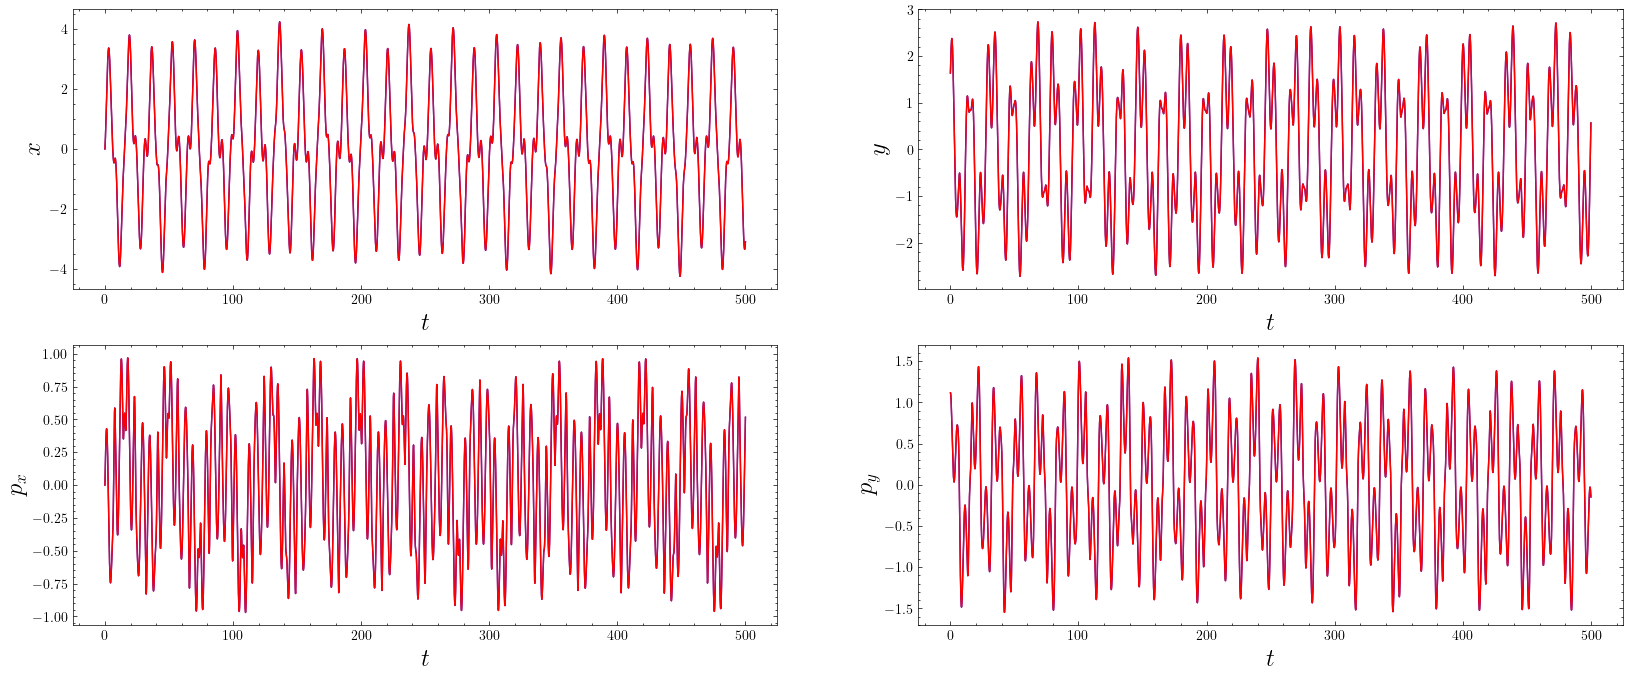

In [13]:
#MODELO SINDY
def eomSINDY(t,R):
    x0,x1,x2,x3=R
    dx0_dt=0.5*x1+x2
    dx1_dt=x3-0.5*x0
    dx2_dt=-0.250*x0 + 0.500*x3 +(x0 - a)/(((x0 - a)**2 + x1**2)**(3/2)) + ((x0 + a)/(((x0 + a)**2 + x1**2)**(3/2)))
    dx3_dt=-0.250*x1 + -0.500*x2 +x1/(((x0 - a)**2 + x1**2)**(3/2))+ x1/(((x0 + a)**2 + x1**2)**(3/2))
    return [dx0_dt,dx1_dt,dx2_dt,dx3_dt]
dt=0.005
y0=[x_0,y_0,px_0,py_0]
t_span = (0, 500)
t_eval = np.arange(t_span[0], t_span[1], dt)

sol_chaos = solve_ivp(eomSINDY, t_span, y0, t_eval=t_eval, method='RK45', rtol=1e-9, atol=1e-9)

x_arr_sindy_chaos = sol_chaos.y.T
t = sol.t
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
axs[0, 0].plot(t, x_arr_mine_chaos[:, 0], "b")
axs[0, 0].plot(t, x_arr_sindy_chaos[:, 0], "r")
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$x$",fontsize=18)
axs[0, 1].plot(t, x_arr_mine_chaos[:, 1], "b")
axs[0, 1].plot(t, x_arr_sindy_chaos[:, 1], "r")
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$y$",fontsize=18)
axs[1, 0].plot(t, x_arr_mine_chaos[:, 2], "b")
axs[1, 0].plot(t, x_arr_sindy_chaos[:, 2], "r")
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$p_x$",fontsize=18)
axs[1, 1].plot(t, x_arr_mine_chaos[:, 3], "b")
axs[1, 1].plot(t, x_arr_sindy_chaos[:, 3], "r")
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$p_y$",fontsize=18)
fig.show()
plt.savefig("Evolucion-temporal-SINDy-chaos.png")
print('-------------------------------------------------------')
print('azul= Solucion con ecuaciones de movimiento originales')
print('azul= Solucion con ecuaciones de movimiento de SINDy')

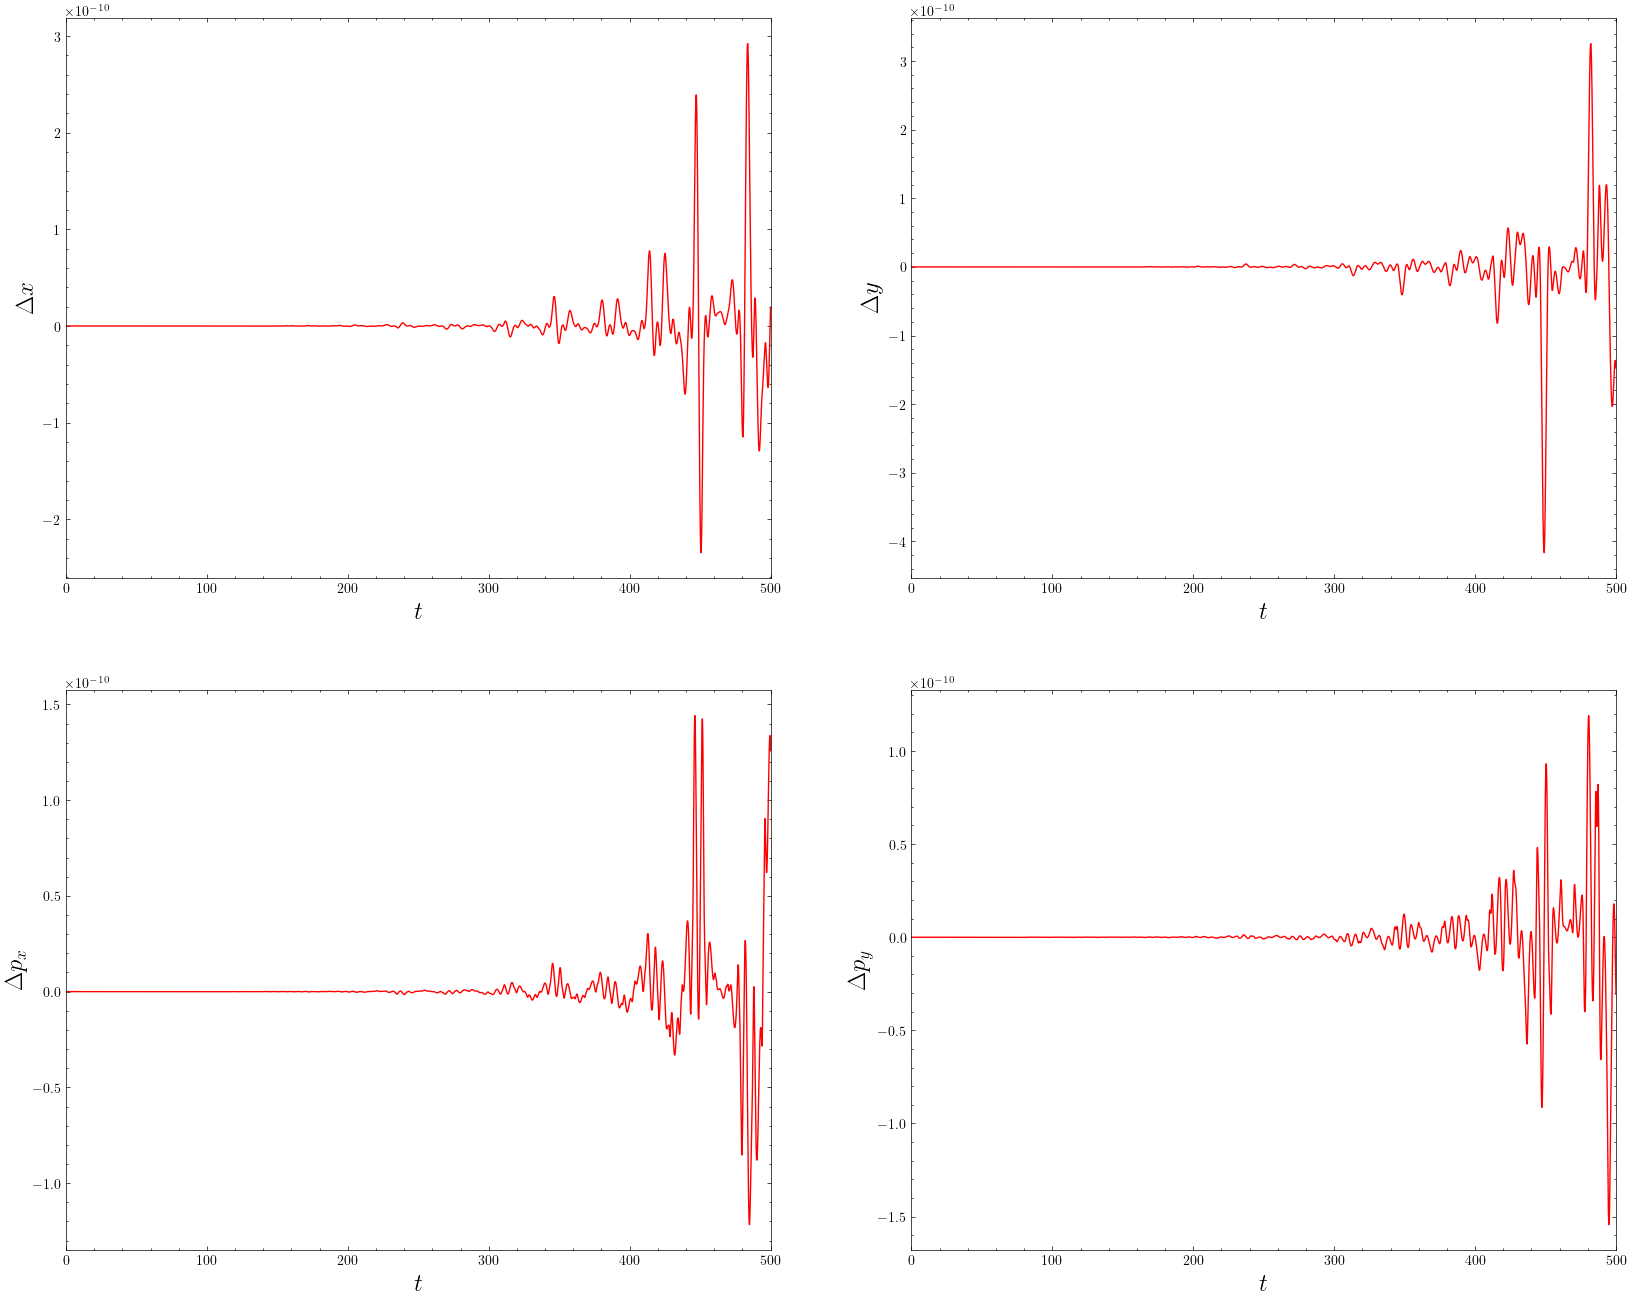

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs[0, 0].plot(t, -x_arr_mine_chaos[:, 0]+x_arr_sindy_chaos[:, 0], "r")
axs[0, 0].set_xlim(0,500)
axs[0, 0].set_xlabel(r"$t$",fontsize=18)
axs[0, 0].set_ylabel(r"$\Delta x$",fontsize=18)
axs[0, 1].plot(t, -x_arr_mine_chaos[:, 1]+x_arr_sindy_chaos[:, 1], "r")
axs[0, 1].set_xlim(0,500)
axs[0, 1].set_xlabel(r"$t$",fontsize=18)
axs[0, 1].set_ylabel(r"$\Delta y$",fontsize=18)
axs[1, 0].plot(t, -x_arr_mine_chaos[:, 2]+x_arr_sindy_chaos[:, 2], "r")
axs[1, 0].set_xlim(0,500)
axs[1, 0].set_xlabel(r"$t$",fontsize=18)
axs[1, 0].set_ylabel(r"$\Delta p_x$",fontsize=18)
axs[1, 1].plot(t, -x_arr_mine_chaos[:, 3]+x_arr_sindy_chaos[:, 3], "r")
axs[1, 1].set_xlim(0,500)
axs[1, 1].set_xlabel(r"$t$",fontsize=18)
axs[1, 1].set_ylabel(r"$\Delta p_y$",fontsize=18)
fig.show()
plt.savefig("error-chaos-SINDy-2.png")

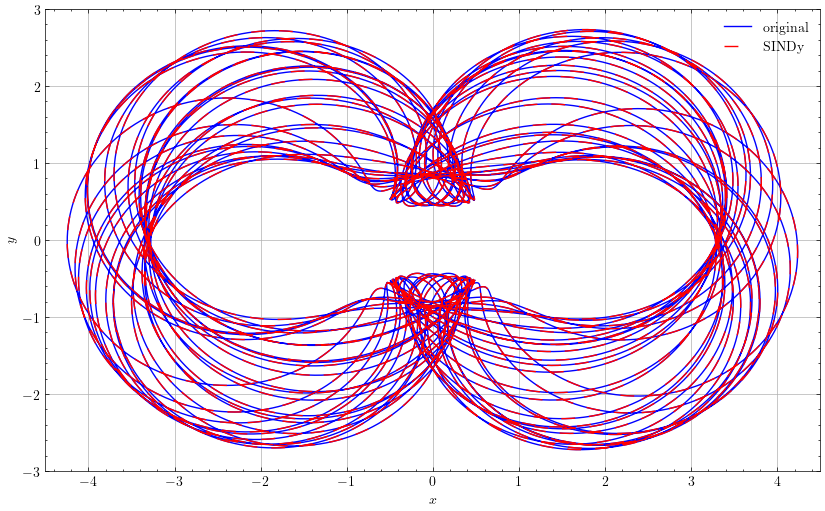

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_arr_mine_chaos[:,0],x_arr_mine_chaos[:,1],'b-',label='original')
plt.plot(x_arr_sindy_chaos[:,0],x_arr_sindy_chaos[:,1],'r--',linestyle=(0,(10,10)),label='SINDy')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-3,3)
plt.xlim(-4.5,4.5)
plt.grid()
plt.legend()
plt.savefig("Trayectoria-SINDy-chaos.png")
plt.show()